In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from visualizations import *

# Load Dataset

In [2]:
data_src = "./dataset/CC GENERAL.csv"
df = pd.read_csv(data_src)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploration

### Quick Exploration

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- **BALANCE** : Balance amount left in customers account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   str    
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHASES_TRX    

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### DQ

**Completeness**

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

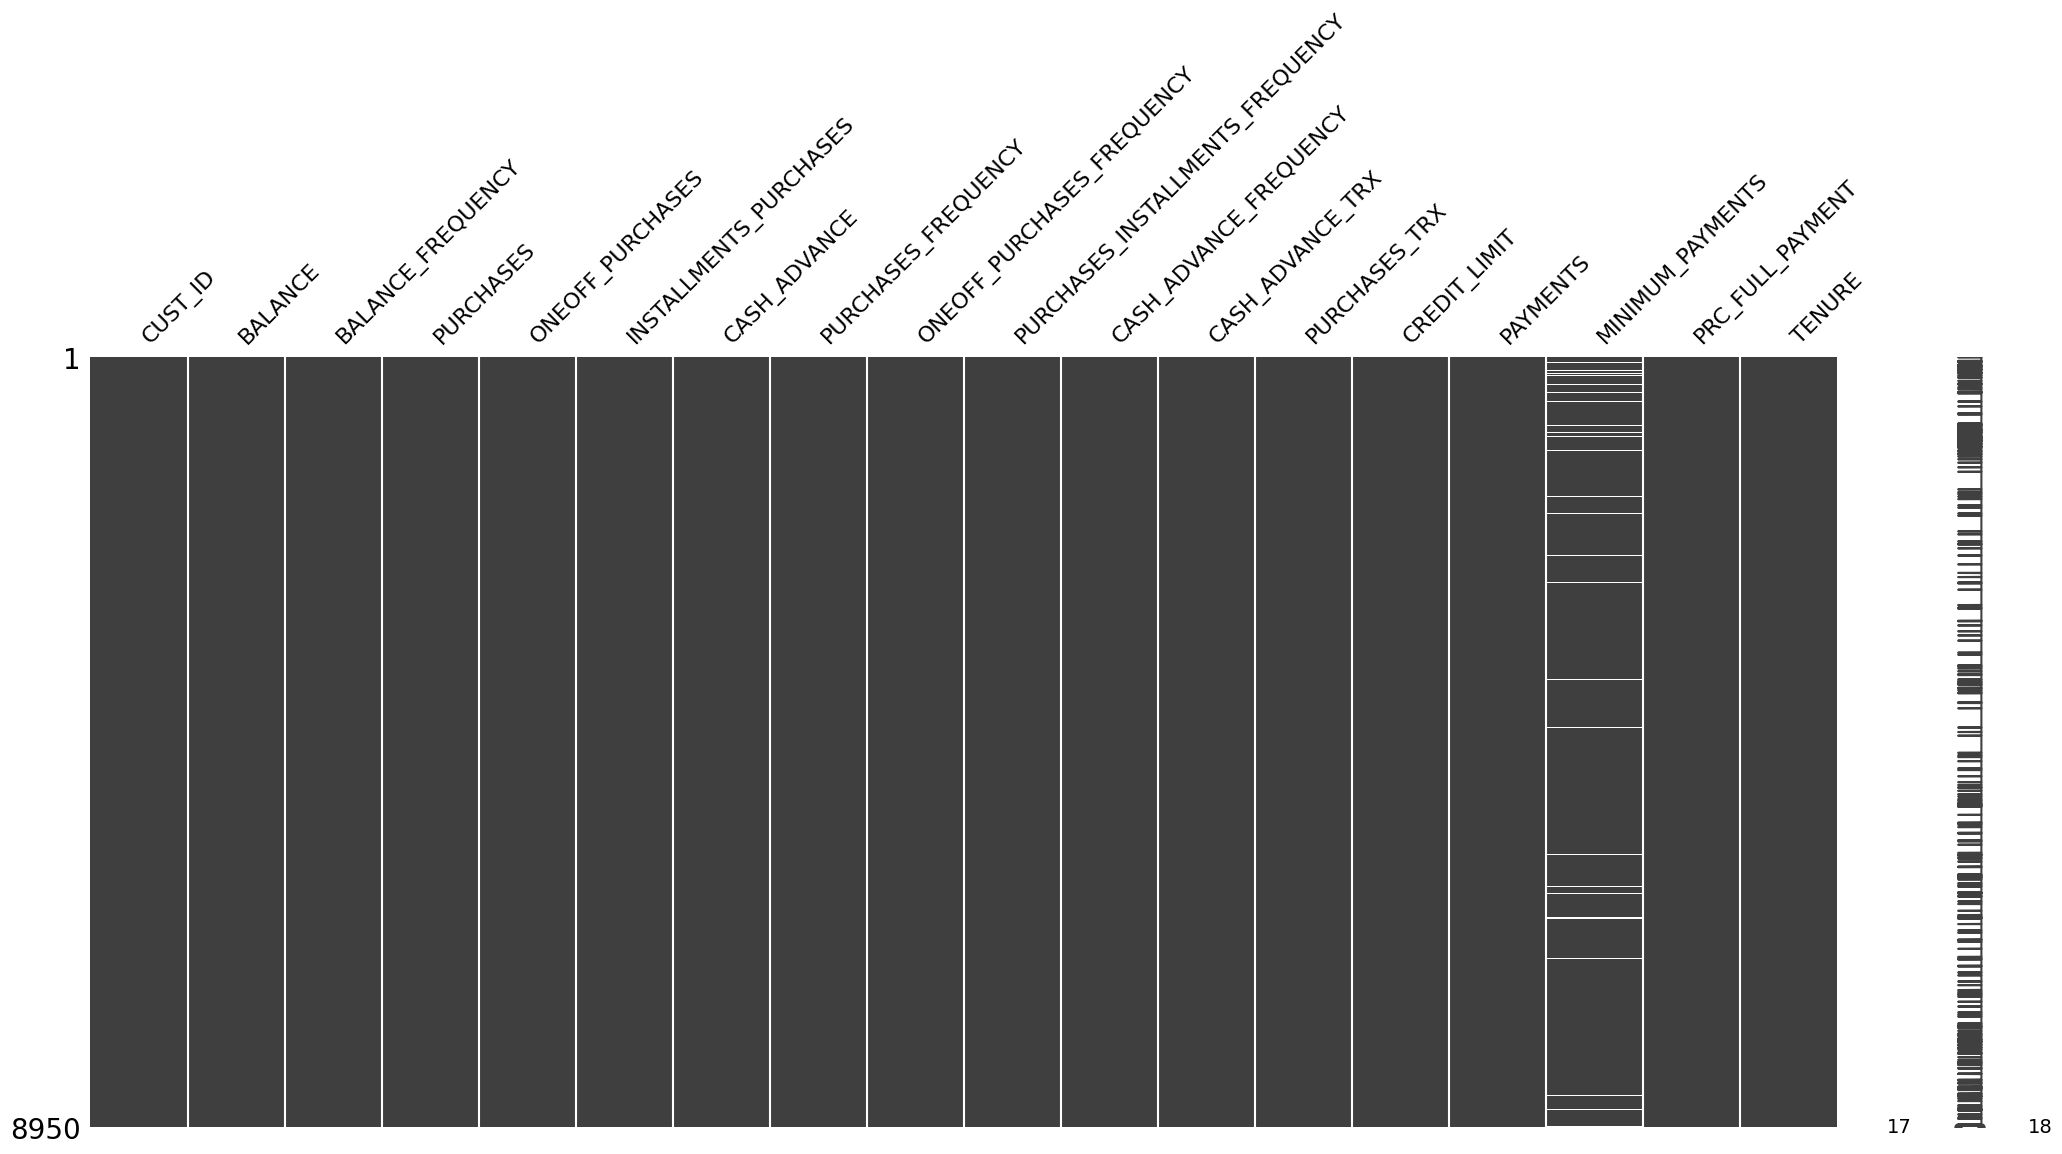

In [7]:
# Visualize missing values as a matrix
msno.matrix(df)

<Axes: >

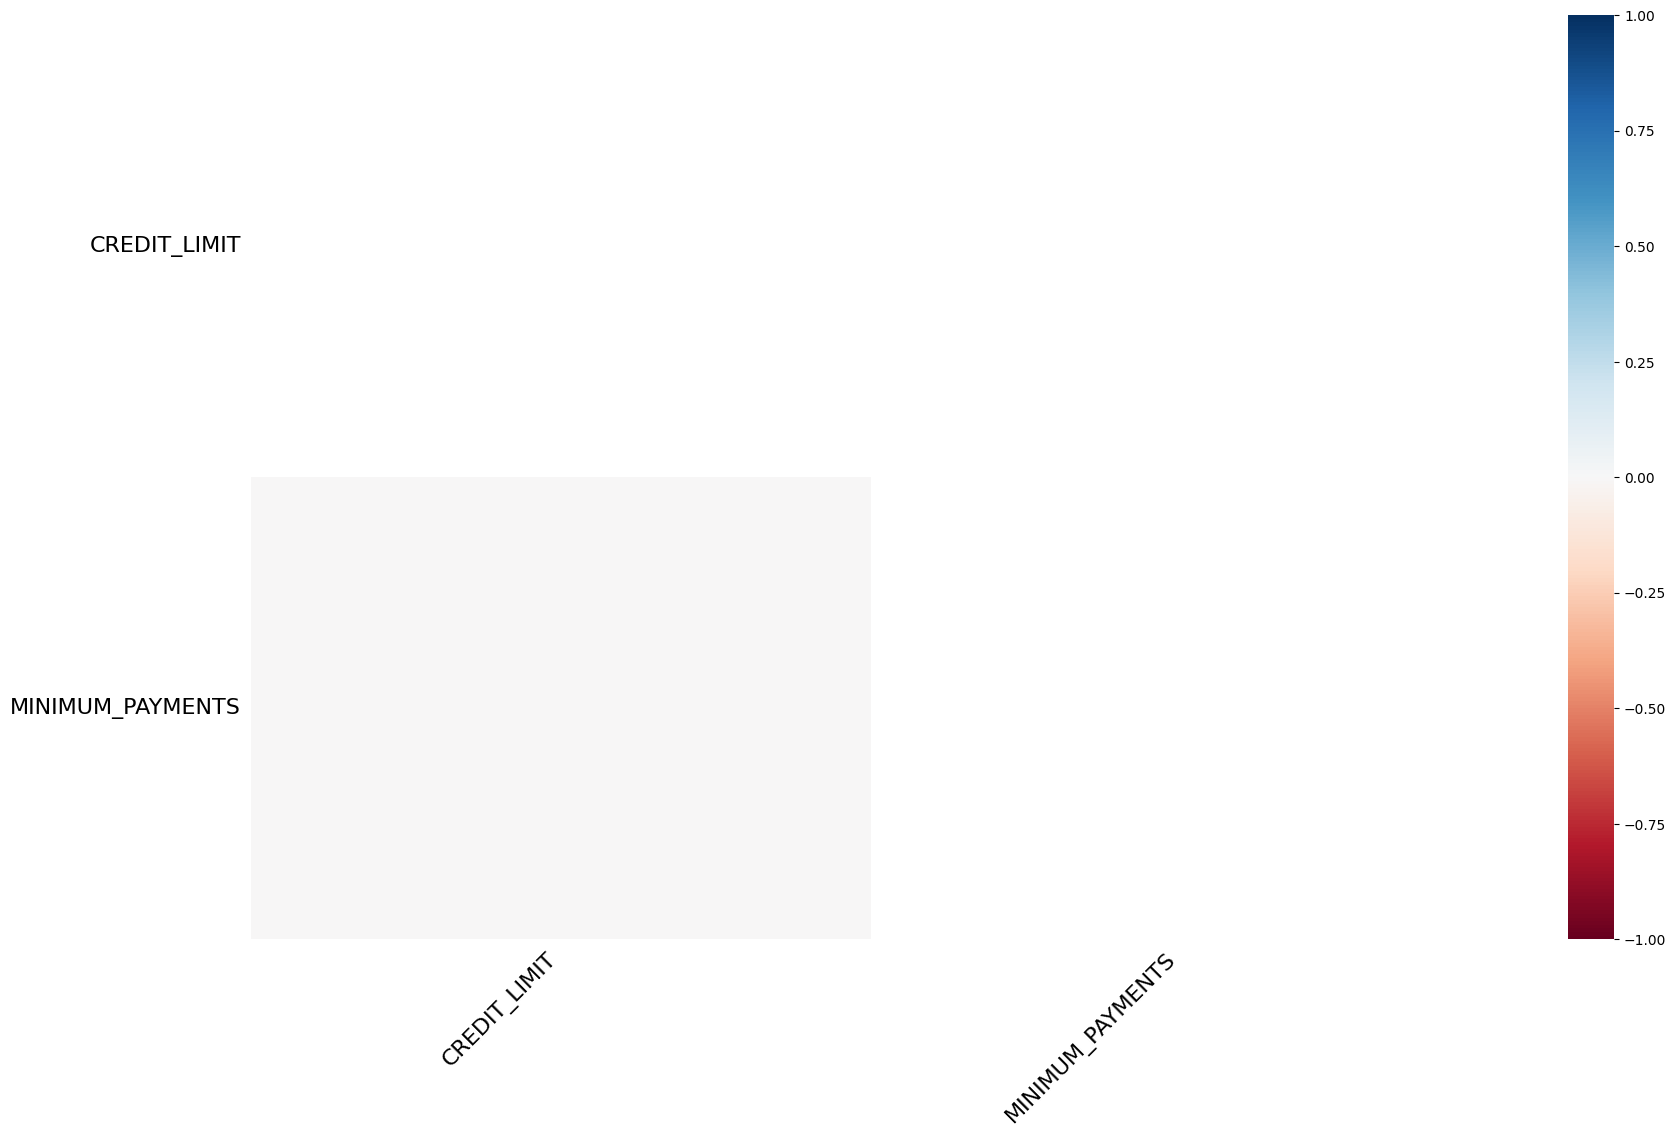

In [8]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)

In [9]:
# check missing values within Minimum_Payment and Credit_Limit
missing_payments = df[df["MINIMUM_PAYMENTS"].isna()]
missing_payments

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [10]:
missing_payments.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


In [11]:
# check the reason behind missing values in Minimum_Payments
missing_payments[["PAYMENTS", "MINIMUM_PAYMENTS"]]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


In [12]:
# PRINT COUNT OF ZEROS IN PAYMENTS
print("Count of zeros in PAYMENTS (Missing Min-Payments):", (missing_payments["PAYMENTS"] == 0).sum())
print(f"Percentage of zeros in PAYMENTS (Missing Min-Payments): {(missing_payments["PAYMENTS"] == 0).sum() / len(missing_payments) * 100:.2f}%")

Count of zeros in PAYMENTS (Missing Min-Payments): 240
Percentage of zeros in PAYMENTS (Missing Min-Payments): 76.68%


In [13]:
def flag_dormant_accounts(row):
    if row['BALANCE'] == 0 and row['PURCHASES'] == 0:
        return "Dormant/Zero-Balance"
    else:
        return "Active"

# Apply the function to create a new column
missing_payments['ACCOUNT_STATUS'] = missing_payments.apply(flag_dormant_accounts, axis=1)

# Check the distribution
status_counts = missing_payments['ACCOUNT_STATUS'].value_counts(normalize=True) * 100
print(status_counts)

ACCOUNT_STATUS
Active                  97.444089
Dormant/Zero-Balance     2.555911
Name: proportion, dtype: float64


Out of all accounts where the system hasn’t generated a minimum payment:

The majority (97.5%) are active accounts. These are typically new accounts that haven’t reached their first billing cycle yet.

A small portion (2.5%) are completely inactive, with no balance and no purchases. These dormant accounts don’t bring in fees or interest, yet the bank still incurs maintenance costs to keep them open.

In [14]:
# Check if there are any cases where PAYMENTS is greater than MINIMUM_PAYMENTS
minimum_payments_notna = df[df['MINIMUM_PAYMENTS'].notna()]
greater_payments = minimum_payments_notna[minimum_payments_notna['PAYMENTS'] > minimum_payments_notna['MINIMUM_PAYMENTS']]


print(f'Shape: {greater_payments.shape}')
greater_payments[["PAYMENTS", "MINIMUM_PAYMENTS"]].head()

Shape: (6272, 18)


,PAYMENTS,MINIMUM_PAYMENTS
0,201.802084,139.509787
1,4103.032597,1072.340217
4,678.334763,244.791237
6,6354.314328,198.065894
7,679.065082,532.033990


In [15]:
# Check if there are any cases where PAYMENTS is less than MINIMUM_PAYMENTS
less_payments = minimum_payments_notna[minimum_payments_notna['PAYMENTS'] < minimum_payments_notna['MINIMUM_PAYMENTS']]

print(f'Shape: {less_payments.shape}')
less_payments[["PAYMENTS", "MINIMUM_PAYMENTS"]].head()

Shape: (2365, 18)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490


https://www.moneylion.com/learn/paying-less-than-the-minimum-on-credit-cards

The minimum payment is the smallest amount you must pay on your credit card balance each month. Credit card issuers calculate the minimum payment as a percentage of your total balance, typically around 1-2% or a flat fee if the balance is small. For example, if you owe $1,000 and your minimum payment is 2%, you must pay $20 that month to avoid penalties.

Paying less than the minimum on credit cards can lead to financial trouble. Fees, interest and a lower credit score can make it hard to recover, but taking proactive steps like budgeting, seeking a side hustle and negotiating with creditors can help you regain control. Always aim to pay more than the minimum when possible and seek additional resources if you struggle to meet your obligations.

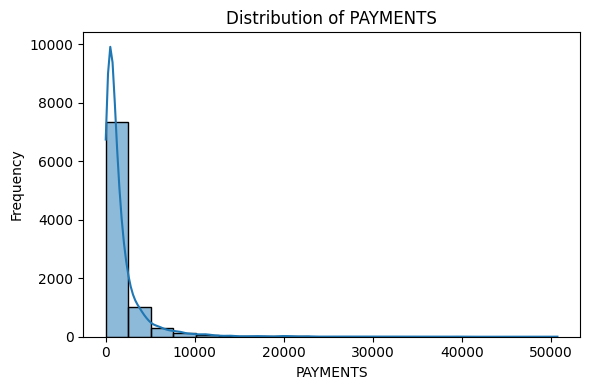

In [16]:
# check PAYMENTS distribution
plot_feature_distribution(df, "PAYMENTS")

In [17]:
# fill missing values in MINIMUM_PAYMENTS with Payments median because of skewness
minpay = df["MINIMUM_PAYMENTS"].copy()
payments_median = df["PAYMENTS"].median()

print(f"Payments Median: {payments_median}")

Payments Median: 856.901546


In [18]:
i = 0

# handle all posiible cases for missing values in MINIMUM_PAYMENTS
for payments, minpayments in zip(df["PAYMENTS"], df["MINIMUM_PAYMENTS"].isna()):

    # if PAYMENTS is zero, set NAN MINIMUM_PAYMENTS to zero
    if (payments == 0) and (minpayments == True):
        minpay[df["PAYMENTS"] == 0] = 0

    # if payments less than median, set MINIMUM_PAYMENTS to payments value
    elif (0 < payments < payments_median) and (minpayments == True):
        minpay[i] = payments

    # if payments greater than median, set MINIMUM_PAYMENTS to payments median
    elif minpayments == True:
        minpay[i] = payments_median

    i += 1

# fill missing values in original datset
df["MINIMUM_PAYMENTS"] = minpay.copy()

In [19]:
# check missing values after filling
print(f"Missing values after filling: {df["MINIMUM_PAYMENTS"].isna().sum()}")

Missing values after filling: 0


In [20]:
# remove credit limit missing values
df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

print(f"Missing values in CREDIT_LIMIT after dropping: {df["CREDIT_LIMIT"].isna().sum()}")

Missing values in CREDIT_LIMIT after dropping: 0


In [21]:
print(f"Missing values after preprocessing:\n\n{df.isna().sum()}")

Missing values after preprocessing:

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


**Consistency**

In [22]:
# check data types
print(df.dtypes)

CUST_ID                                 str
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


Data Types are correct.

### 💳 Credit Card Dataset Feature Encyclopedia

| Feature Name | Data Type | Category | Description |
| :--- | :--- | :--- | :--- |
| **CUST_ID** | Nominal | Identifier | Unique identifier for each credit card user. (Exclude from modeling). |
| **BALANCE** | Float | Monetary | Current credit card balance amount. |
| **BALANCE_FREQUENCY** | Float (0-1) | Frequency | How often the balance is updated (1 = frequent, 0 = not frequent). |
| **PURCHASES** | Float | Monetary | Total amount of purchases made from the account. |
| **ONEOFF_PURCHASES** | Float | Monetary | Maximum purchase amount made in a single transaction. |
| **INSTALLMENTS_PURCHASES** | Float | Monetary | Total amount of purchases made in installments. |
| **CASH_ADVANCE** | Float | Monetary | Total cash-in-advance amount taken by the user. |
| **PURCHASES_FREQUENCY** | Float (0-1) | Frequency | How frequently purchases are being made. |
| **ONEOFF_PURCHASES_FREQ** | Float (0-1) | Frequency | How frequently one-off purchases are happening. |
| **PURCHASES_INSTALL_FREQ** | Float (0-1) | Frequency | How frequently purchases in installments are being made. |
| **CASH_ADVANCE_FREQ** | Float (0-1) | Frequency | How often the cash-in-advance is being requested. |
| **CASH_ADVANCE_TRX** | Integer | Count | Number of transactions made with "Cash in Advance". |
| **PURCHASES_TRX** | Integer | Count | Number of purchase transactions made. |
| **CREDIT_LIMIT** | Float | Monetary | The limit of the credit card for the user. |
| **PAYMENTS** | Float | Monetary | Total amount of payments done by the user. |
| **MINIMUM_PAYMENTS** | Float | Monetary | Minimum amount of payments made by the user. |
| **PRC_FULL_PAYMENT** | Float (0-1) | Frequency | Percent of full payment paid by user. |
| **TENURE** | Integer | Temporal | Number of months the user has been using the credit card service. |

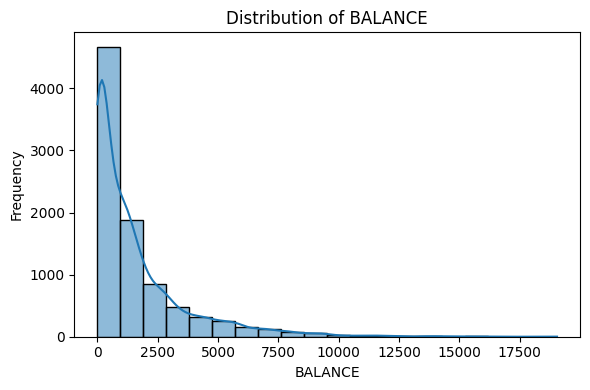

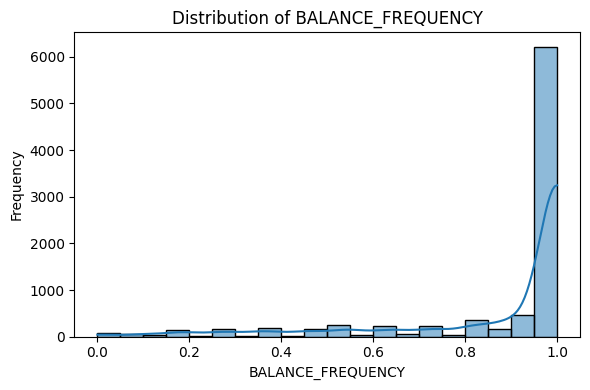

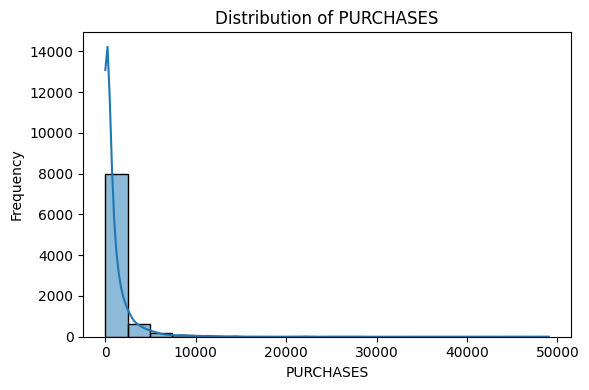

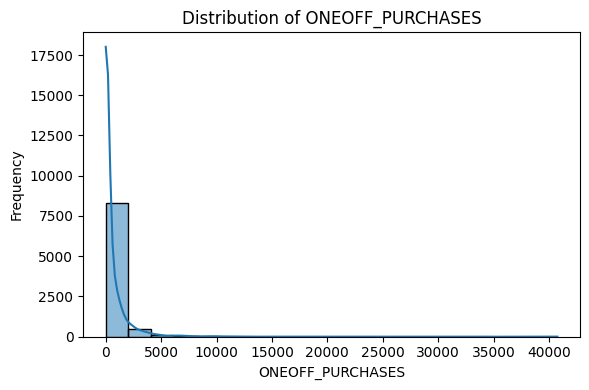

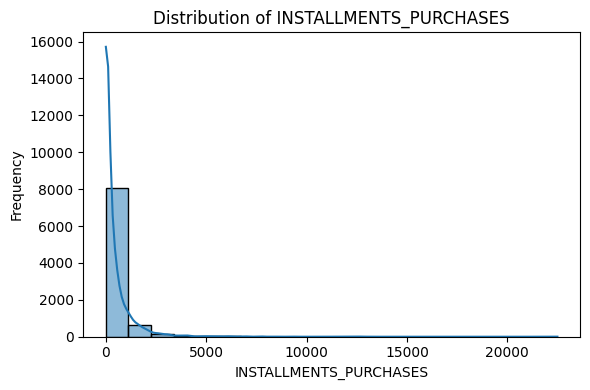

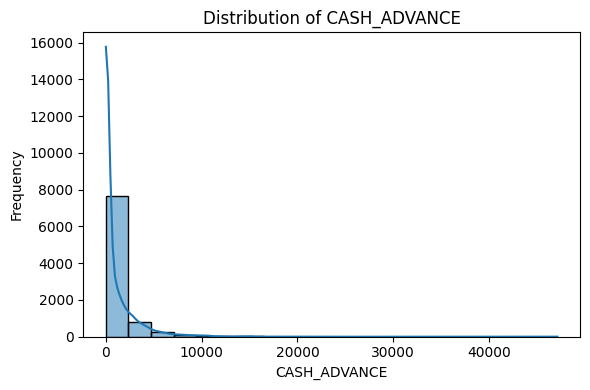

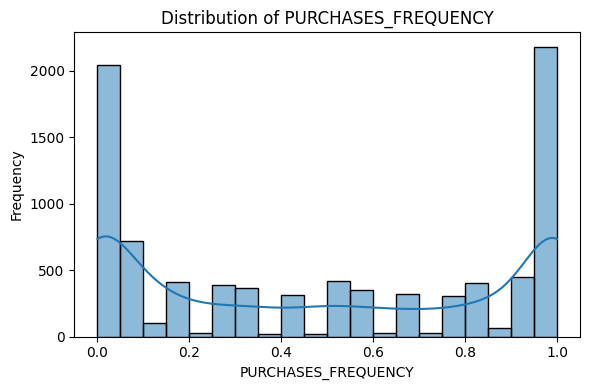

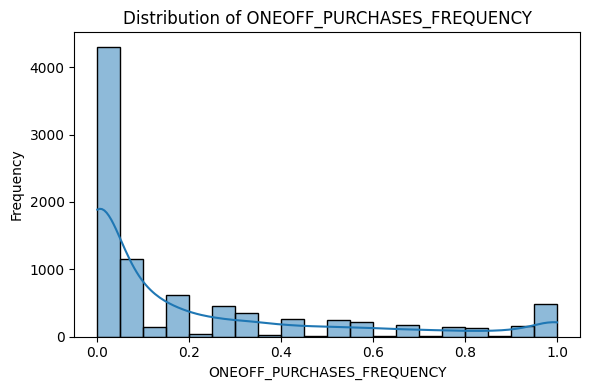

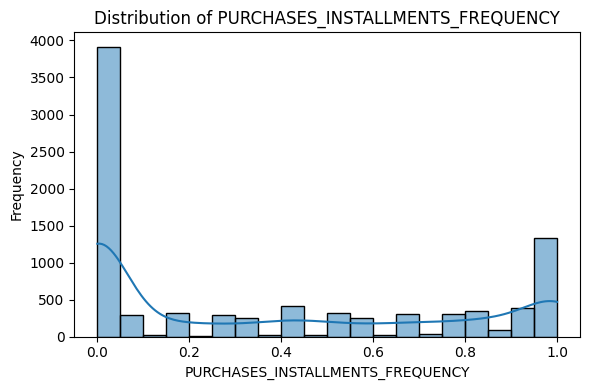

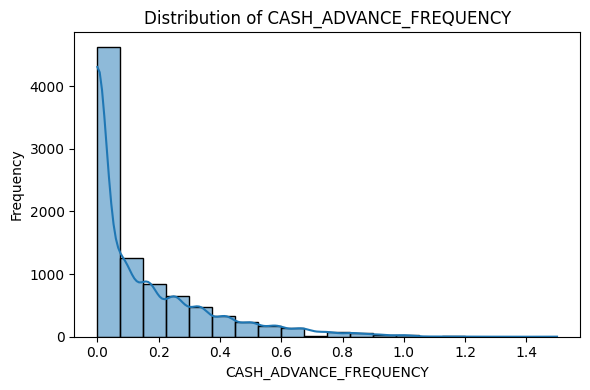

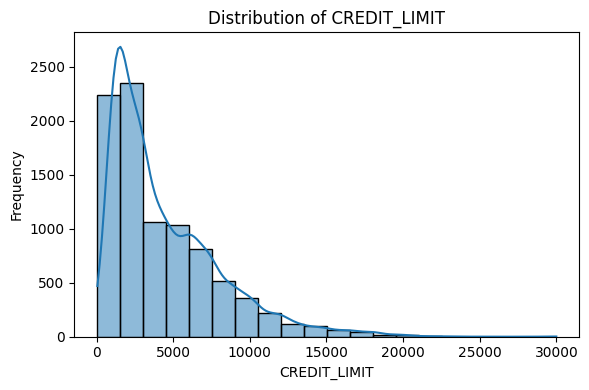

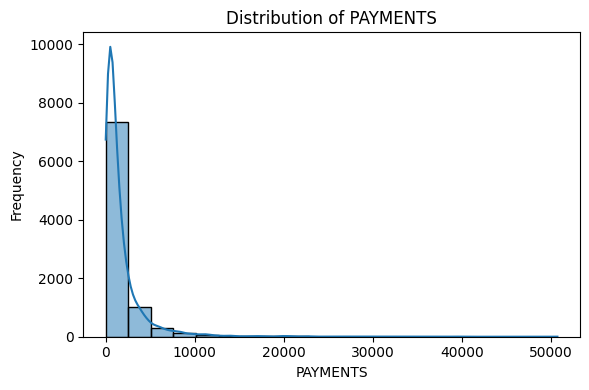

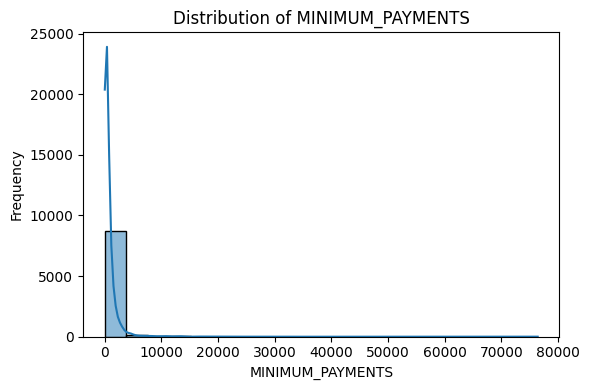

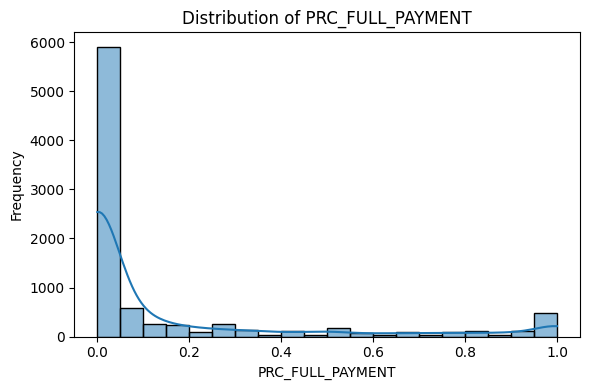

In [23]:
# plot distribution of each numerical feature
numerical_features = df.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    if feature not in ["CASH_ADVANCE_TRX", "PURCHASES_TRX", "TENURE"]:
        plot_feature_distribution(df, feature)

In [24]:
# CHECK VALUE COUNTS 
for feature in ["CASH_ADVANCE_TRX", "PURCHASES_TRX", "TENURE"]:
    print(f"Unique Values for {feature}:\n{df[feature].unique()}")
    print(f"Max Value: {df[feature].max()}")
    print(f"Min Value: {df[feature].min()}\n")

Unique Values for CASH_ADVANCE_TRX:
[  0   4   1   3   6  13   5  16  10   2  11   7  12  37  27  23  21  14
  40   8   9  26  15  18  28  24  20  17  22  31 123  52  51  62  19  25
  30  29  53  45  43  42 107  38  56  39  32  33  50  34  63  36 110  47
  48  71  35  93  80  44  61  46  49  69  41]
Max Value: 123
Min Value: 0

Unique Values for PURCHASES_TRX:
[  2   0  12   1   8  64   5   3   6  26  11   9  92  17  13  45  14  41
  27  20  87  18   4  42  61  33   7  50  22  23  60  46  75  31  10  34
  81  25  85 217  19  52 216  97  24  77 130  90  44  39  15  30  36 123
 151  21 101  49  98  28  84  93  72  38  99  62  48  16  32  51  74  29
  59  76  47 126 229  40 103 121 157 114  53  83  43  54 222  66 141  37
  79  70  80 194 117 100 111  67 219  55 152 104 182  88  82  71  78  35
 122 105 108  69 175 135  91  65  68 119  63 140 113 358  58 248 129  56
  89  57 139 176 136 195  73 109 208 115 110 147 273 102 185 171 168 232
  95  86 148 112 128 254 198 298 154 116 142 131 347 

**Uniqueness**

In [25]:
# check duplicates
print(f"Duplicates in dataset: {df.duplicated().sum()}")

Duplicates in dataset: 0


## Check Features

In [26]:
# drop unwanted columns
df = df.drop(columns=["CUST_ID"])

### Correlation between features

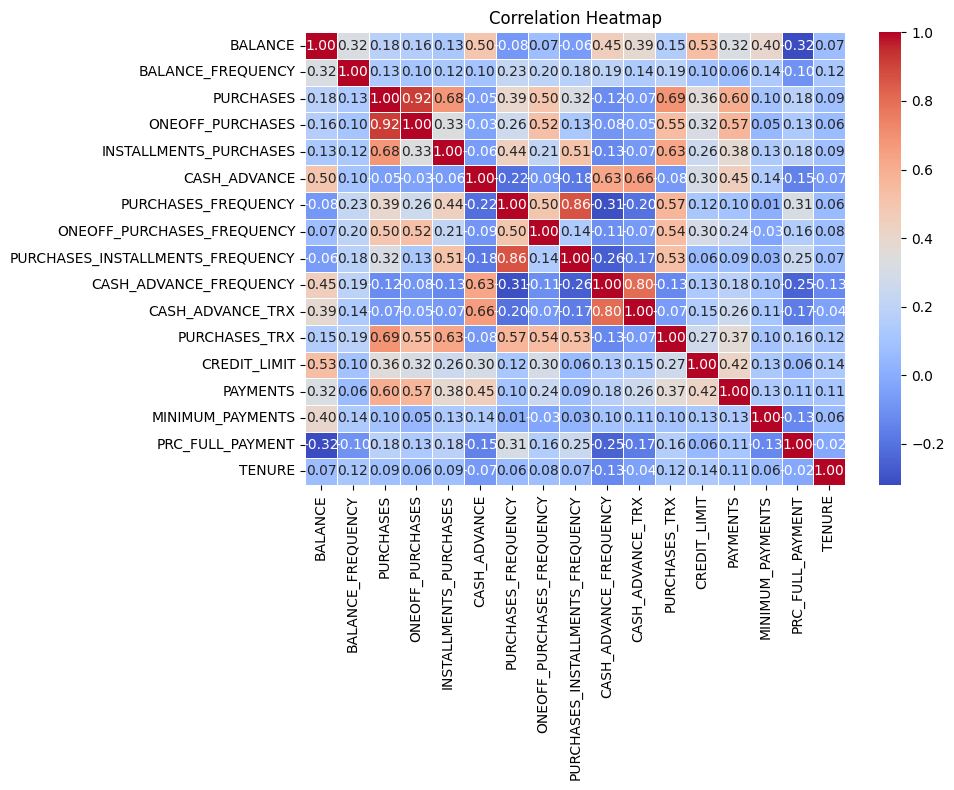

In [27]:
plot_correlation_heatmap(df, numerical_features)

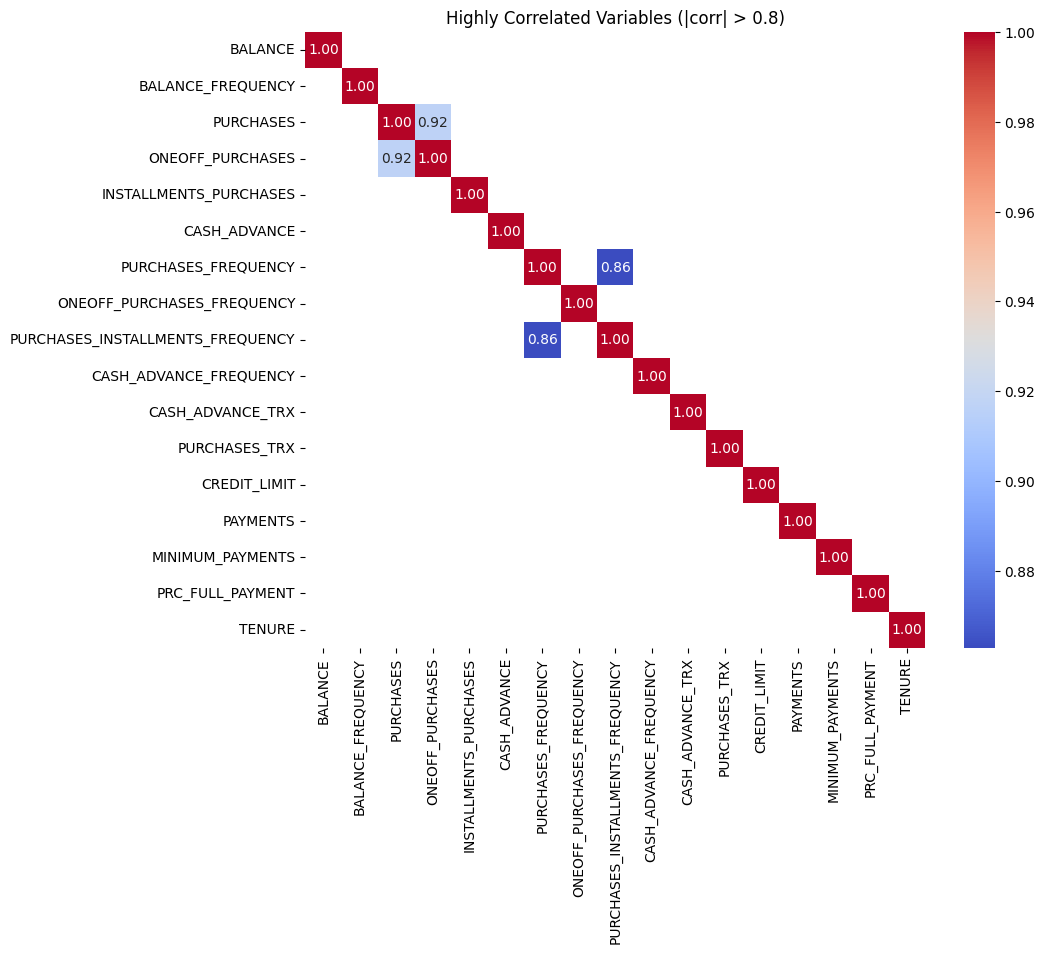

In [28]:
plt.figure(figsize=(10, 8))

# filter out highley correlated features
corr_mat = df.corr()

high_corr= corr_mat[(corr_mat > 0.8) | (corr_mat < -0.8)]

sns.heatmap(high_corr, 
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
           )

plt.title('Highly Correlated Variables (|corr| > 0.8)')
plt.show()

## Bivariate Relation

**1- Is there a positive relationship between CASH_ADVANCE and CASH_ADVANCE_TRX?**


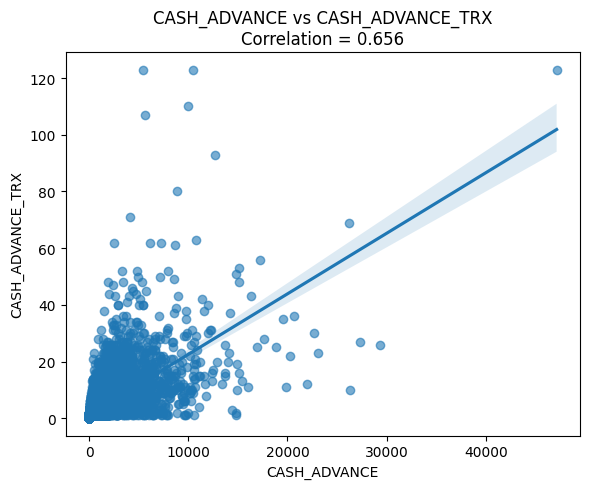

In [29]:
plot_feature_relation(df, "CASH_ADVANCE", "CASH_ADVANCE_TRX")

**Conclusion**: Customers who withdraw more money also withdraw more often.

**2- Does a higher CASH_ADVANCE correspond to a higher CASH_ADVANCE_FREQUENCY?**

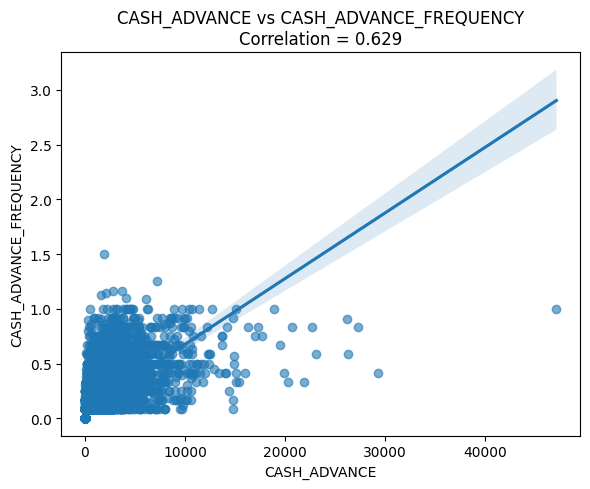

In [30]:
plot_feature_relation(df, "CASH_ADVANCE", "CASH_ADVANCE_FREQUENCY")

**Conclusion**: recurring reliance on credit.

**3- What is the correlation between CASH_ADVANCE and PRCFULLPAYMENT?**

Do customers who rely on cash advances tend to not pay their full balance?

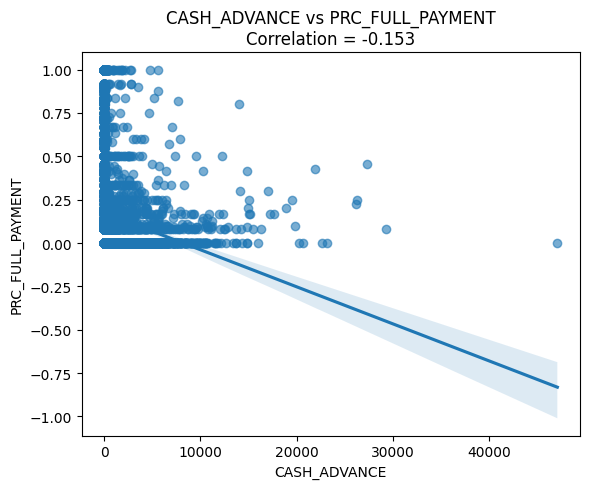

In [31]:
plot_feature_relation(df, "CASH_ADVANCE", "PRC_FULL_PAYMENT")

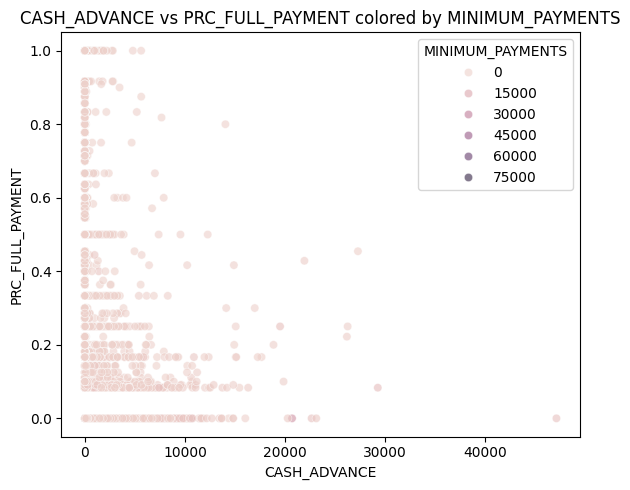

In [32]:
plot_scatter_with_hue(df, "CASH_ADVANCE", "PRC_FULL_PAYMENT", "MINIMUM_PAYMENTS")

**Conclusion**: The relationship between Cash Advance and PRC Full Payment shows a weak negative correlation, indicating that these customers tend to generate high-interest revenue for the bank while also carrying higher credit risk.

**4- What percentage of the customer base has a PRCFULLPAYMENT near 1.0 while maintaining high PURCHASES?**

In [33]:
perfect_prcfullpay_cust = df["PRC_FULL_PAYMENT"] >= 0.95
high_purchases =  df["PURCHASES"] > df["PURCHASES"].mean()

high_purchasers = df[perfect_prcfullpay_cust & high_purchases]

high_purchasers_percent = len(high_purchasers) / len(df) * 100

print(f"Percentage of disciplined high-spending customers: {high_purchasers_percent:.2f}%")

Percentage of disciplined high-spending customers: 2.37%


**Conclusion**: only **2.37%** of the customer base can be classified as disciplined high-spending customers — those who maintain a PRCFULLPAYMENT near 1.0 while consistently making high PURCHASES.

Exhibit financial discipline by paying their full balance regularly.

**5- Is there a segment with high BALANCE_FREQUENCY but low PURCHASES_TRX?**

In [34]:
segment = df[(df['BALANCE_FREQUENCY'] >= 0.8) & 
             (df['PURCHASES_TRX'] <= df['PURCHASES_TRX'].median())]

percentage = len(segment) / len(df) * 100
print(f"Perecnetage of Dormant Spenders: {percentage:.2f}%")

Perecnetage of Dormant Spenders: 36.29%


**Conclusion**: 36.29% of the customer base falls into the segment of customers who frequently update their balance (high BALANCE_FREQUENCY) but perform relatively few purchase transactions (low PURCHASES_TRX).

### Features Distributions

Since Data is right skewed with large +ve numbers, we will apply log transformation on it

In [35]:
# transform features on non-zero negative features
positive_skewed_features = ["BALANCE",
                            "PURCHASES",
                            "ONEOFF_PURCHASES",
                            "INSTALLMENTS_PURCHASES",
                            "CASH_ADVANCE",
                            "CREDIT_LIMIT",
                            "PAYMENTS",
                            "MINIMUM_PAYMENTS"]

count_features = ["CASH_ADVANCE_TRX", "PURCHASES_TRX"]

frequency_features = [
                        "BALANCE_FREQUENCY",
                        "PURCHASES_FREQUENCY",
                        "ONEOFF_PURCHASES_FREQUENCY",
                        "PURCHASES_INSTALLMENTS_FREQUENCY",
                        "CASH_ADVANCE_FREQUENCY",
                        "PRC_FULL_PAYMENT"
                    ]


temporal_features = ["TENURE"]

Temporal Features:



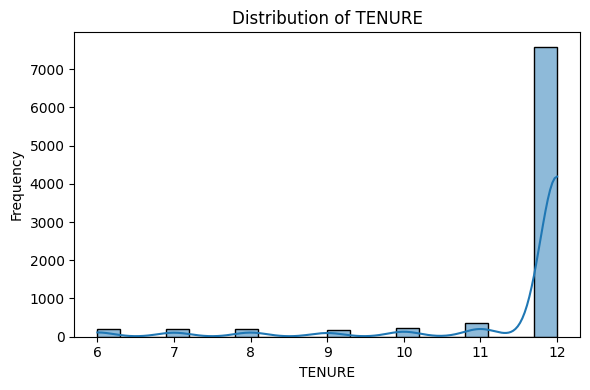

In [36]:
print("Temporal Features:\n")

for feature in temporal_features:
    plot_feature_distribution(df, feature)

Large Scale Features:



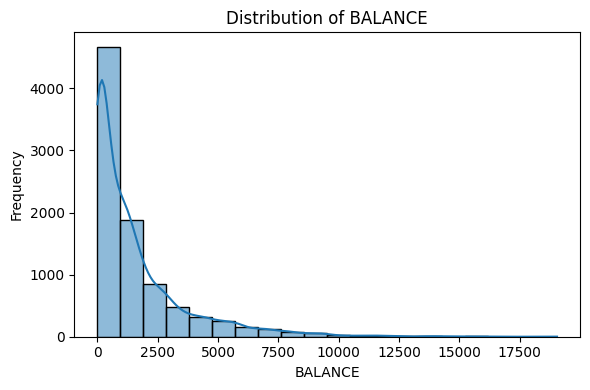

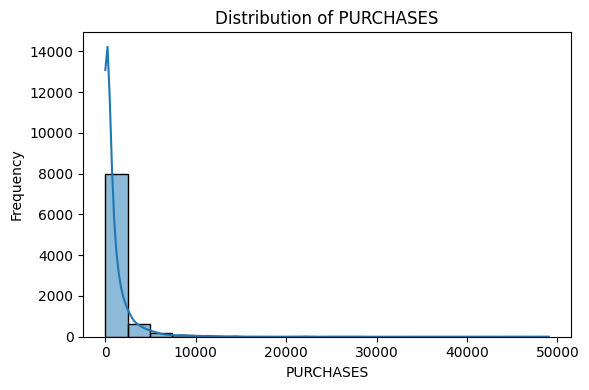

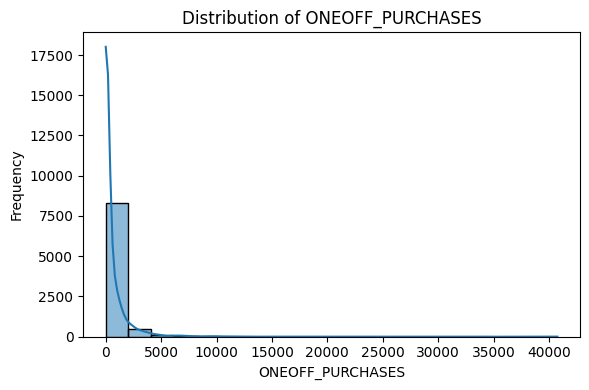

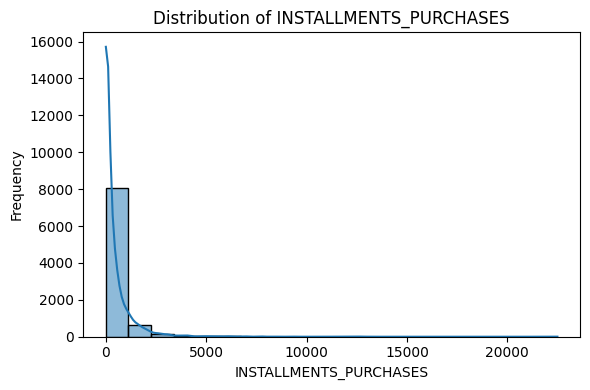

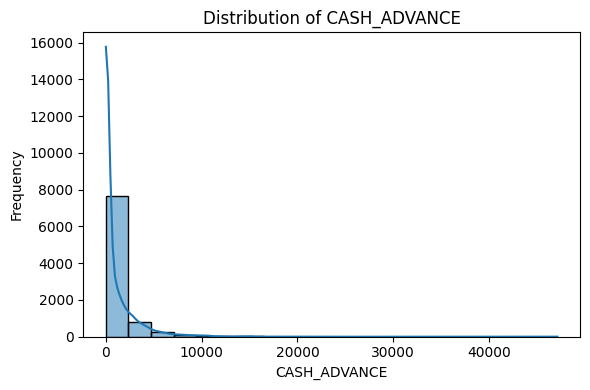

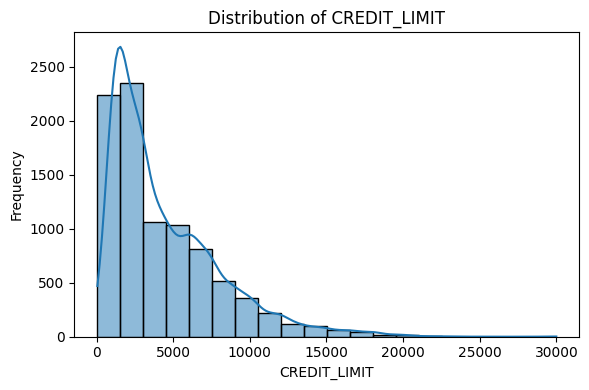

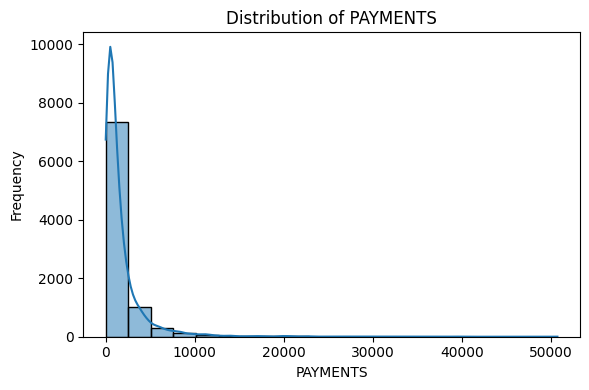

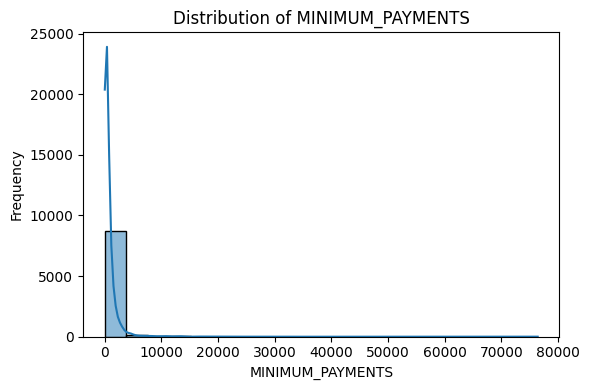

In [37]:
print("Large Scale Features:\n")

for feature in positive_skewed_features:
    plot_feature_distribution(df, feature)

Count Features:



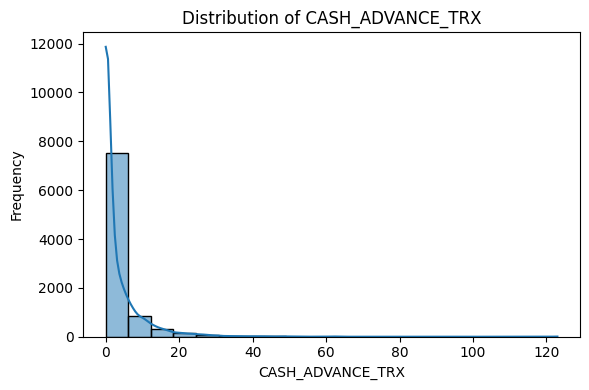

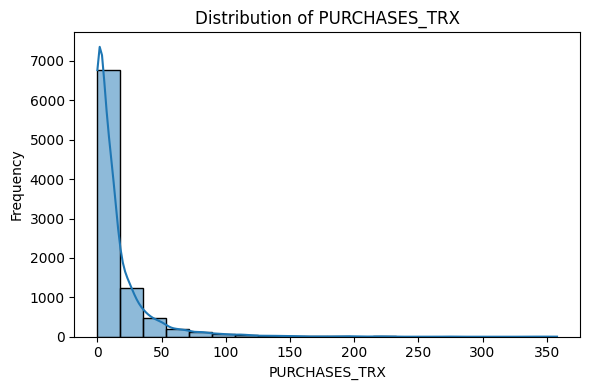

In [38]:
print("Count Features:\n")

for feature in count_features:
    plot_feature_distribution(df, feature, bins=20)

Frequency Features:



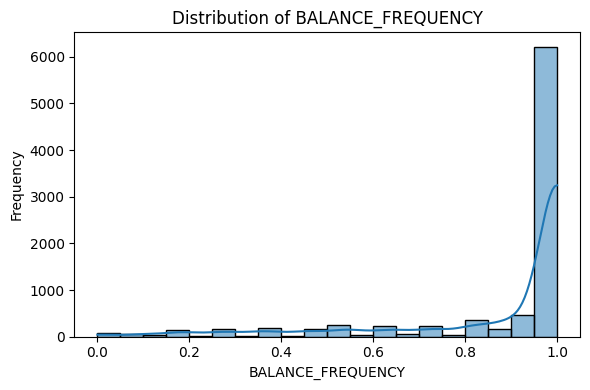

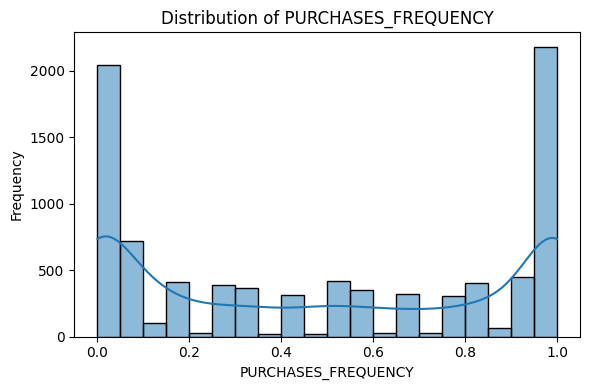

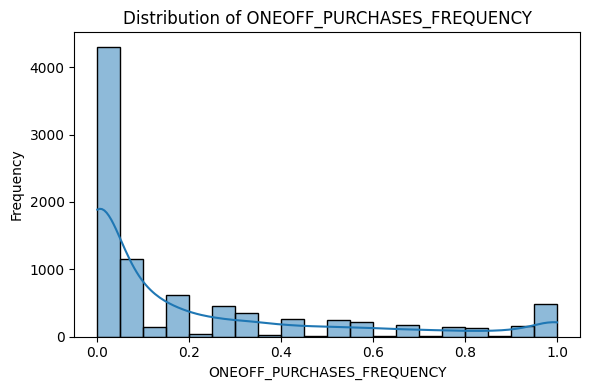

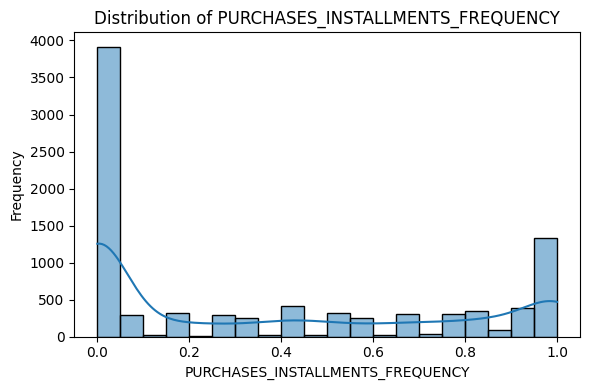

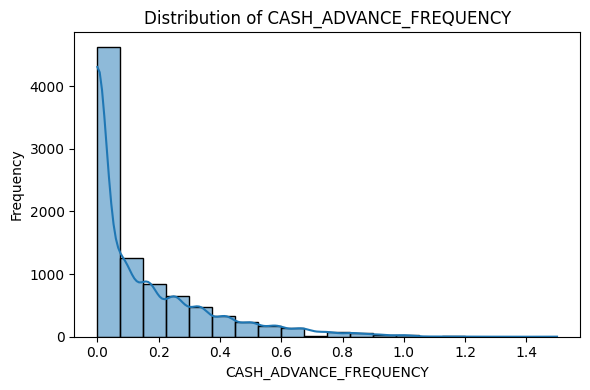

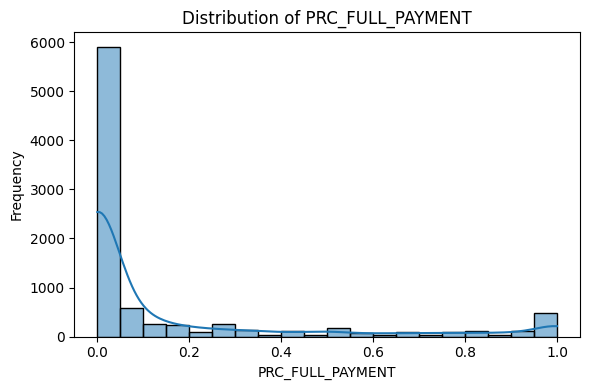

In [39]:
print("Frequency Features:\n")

for feature in frequency_features:
    plot_feature_distribution(df, feature, bins=20)

Count Features and High Scale features will be the only ones to be transformed using Log Transformation, so that the distribution be normal

In [40]:
transformed_feats = positive_skewed_features + count_features

df_log1 = df.copy()
df_logarithmic = df.copy()

In [41]:
# save tranformed features
import json

with open("./transformers/transformed_features.json", "w") as f:
    json.dump(transformed_feats, f)

In [42]:
for feat in transformed_feats:
    df_log1[feat] = np.log1p(df[feat])

In [43]:
for feat in transformed_feats:
    df_logarithmic[feat] = np.log(df[feat] + 0.01)

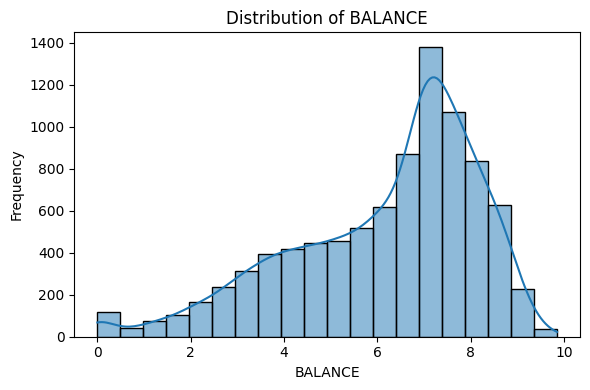

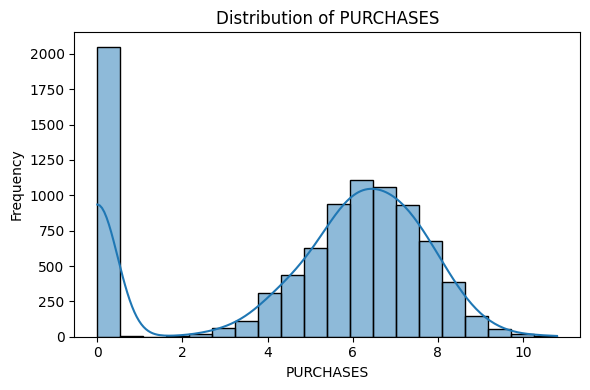

In [44]:
# check distribution
for feature in transformed_feats[:2]:
    plot_feature_distribution(df_log1, feature)

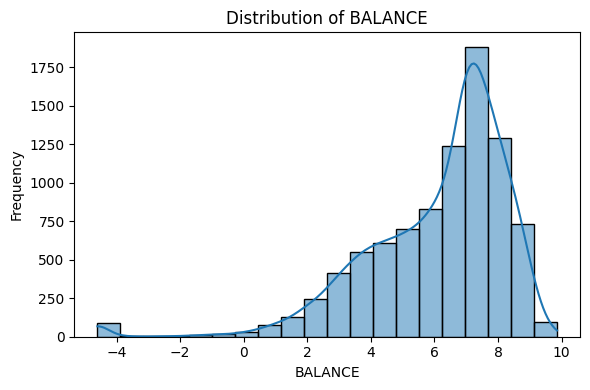

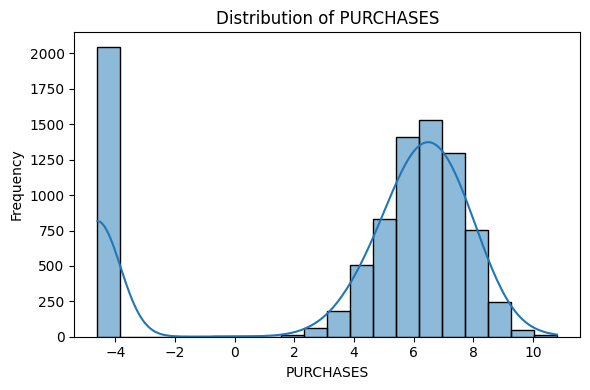

In [45]:
# check distribution
for feature in transformed_feats[:2]:
    plot_feature_distribution(df_logarithmic, feature)

We will stick to log1 transformed data because of its ability to handle zero

In [46]:
df_log1.to_csv("./dataset/CC_GENERAL_log1p.csv", index=False)
df_logarithmic.to_csv("./dataset/CC_GENERAL_log2.csv", index=False)

In [47]:
df_logarithmic.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,6.095192,0.877350,3.842887,0.983692,1.335083,0.935810,0.490405,0.202480,0.364478,0.135141,-1.706516,0.715299,8.094411,6.498676,5.631093,0.153732,11.517935
std,2.238473,0.236798,4.750910,5.479740,5.311919,5.815039,0.401360,0.298345,0.397451,0.200132,3.079342,3.080453,0.820024,2.176631,2.076185,0.292511,1.337134
min,-4.605170,0.000000,-4.605170,-4.605170,-4.605170,-4.605170,0.000000,0.000000,0.000000,0.000000,-4.605170,-4.605170,3.912223,-4.605170,-4.605170,0.000000,6.000000
25%,4.854962,0.888889,3.684118,-4.605170,-4.605170,-4.605170,0.083333,0.000000,0.000000,0.000000,-4.605170,0.009950,7.377765,5.948799,5.102311,0.000000,12.000000
50%,6.772726,1.000000,5.890262,3.637849,4.488749,-4.605170,0.500000,0.083333,0.166667,0.000000,-4.605170,1.947338,8.006371,6.753523,5.689648,0.000000,12.000000
75%,7.627731,1.000000,7.012277,6.359297,6.149878,7.015603,0.916667,0.300000,0.750000,0.222222,1.388791,2.833801,8.779559,7.550288,6.677922,0.142857,12.000000
max,9.854463,1.000000,10.800383,10.615487,10.021271,10.760818,1.000000,1.000000,1.000000,1.500000,4.812266,5.880561,10.308953,10.834105,11.243819,1.000000,12.000000


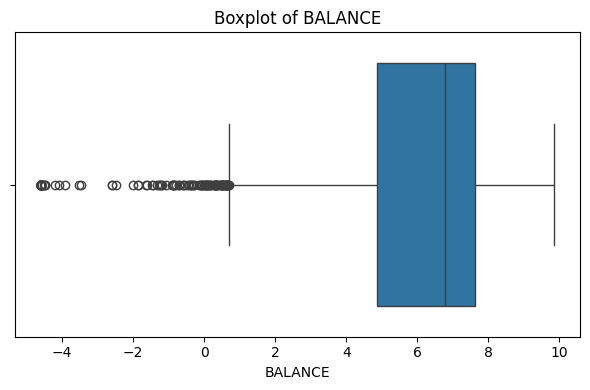

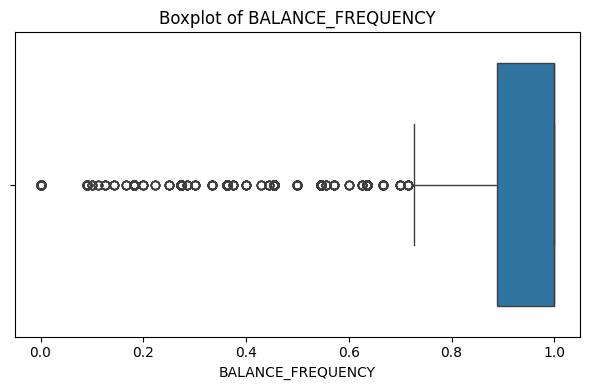

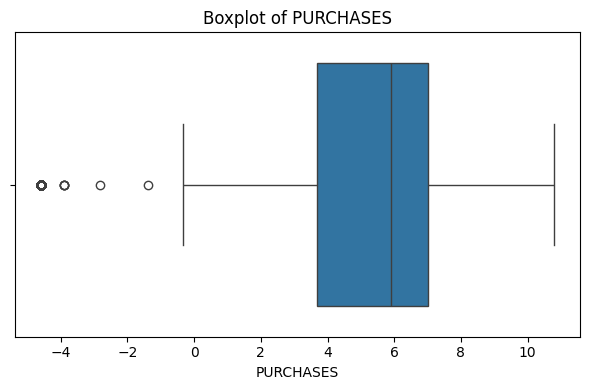

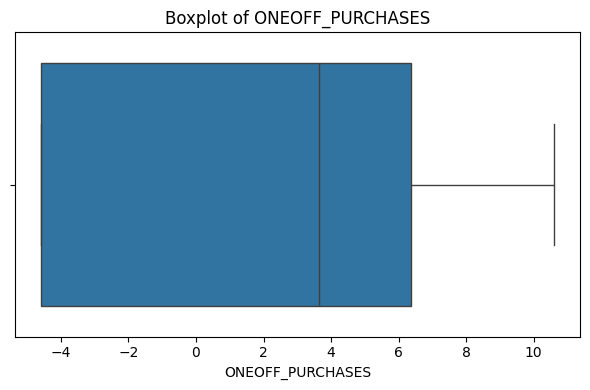

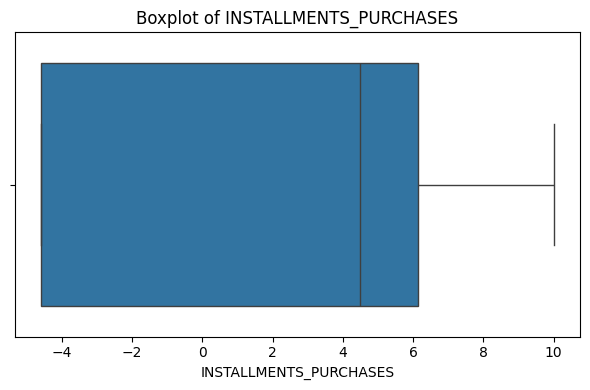

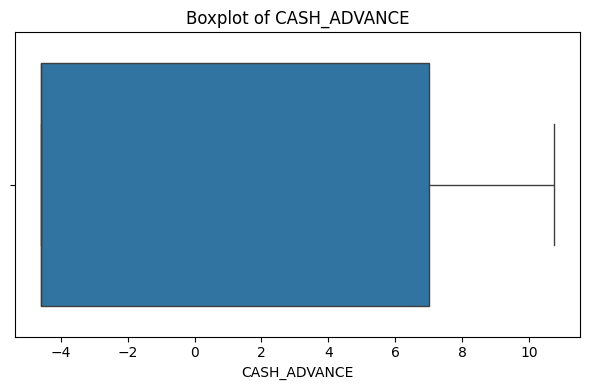

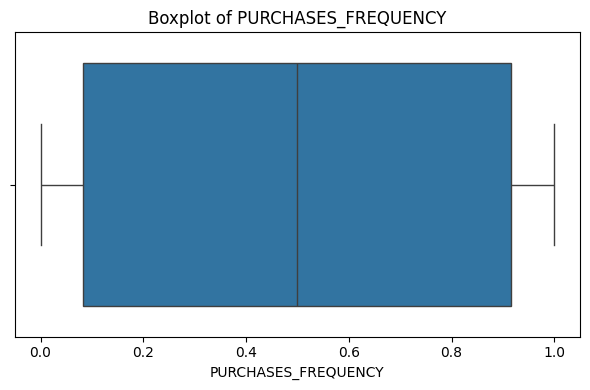

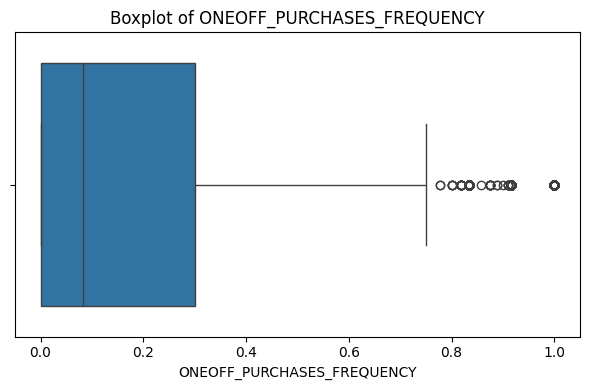

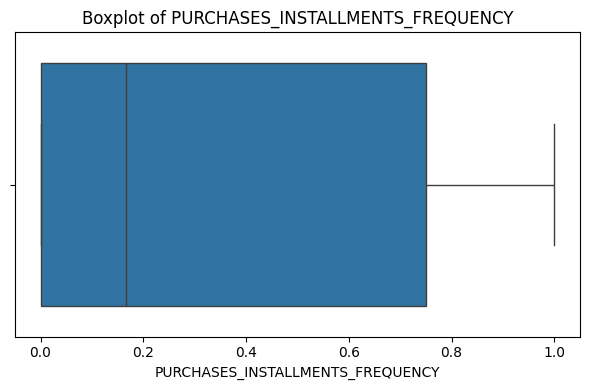

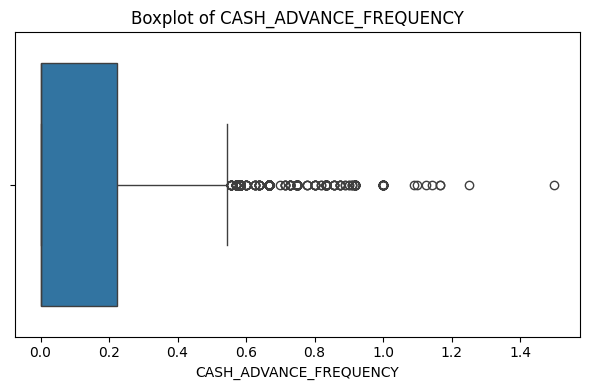

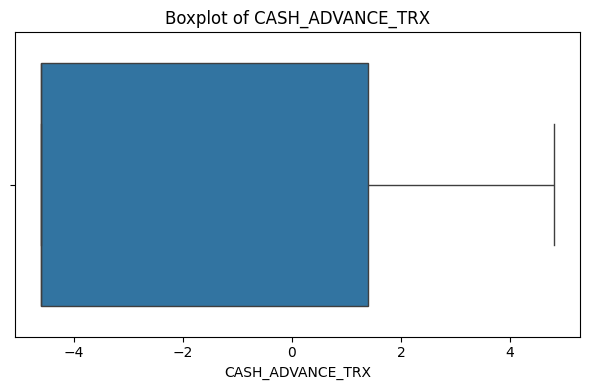

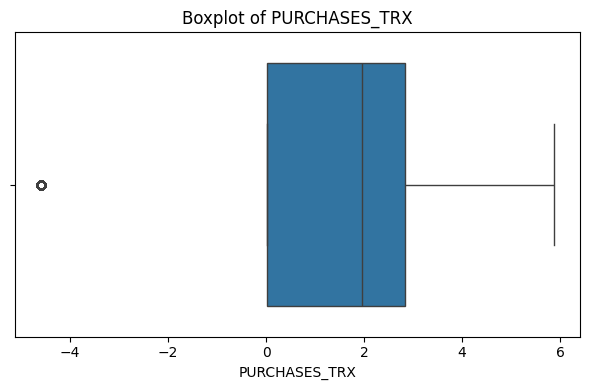

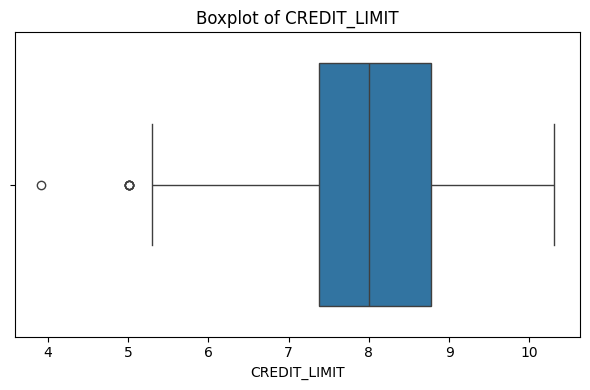

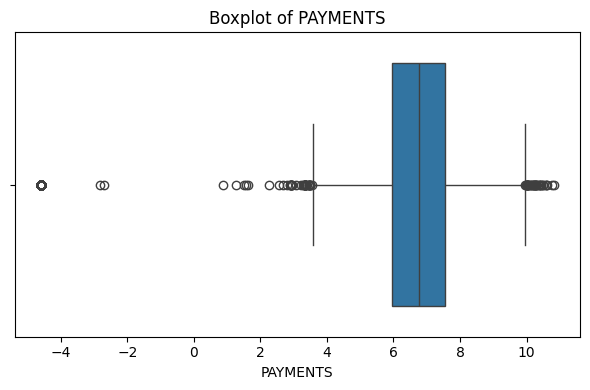

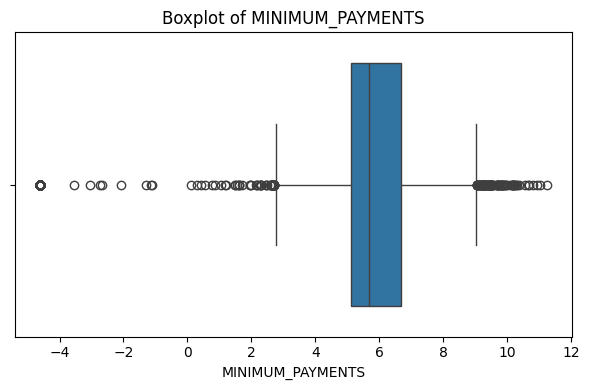

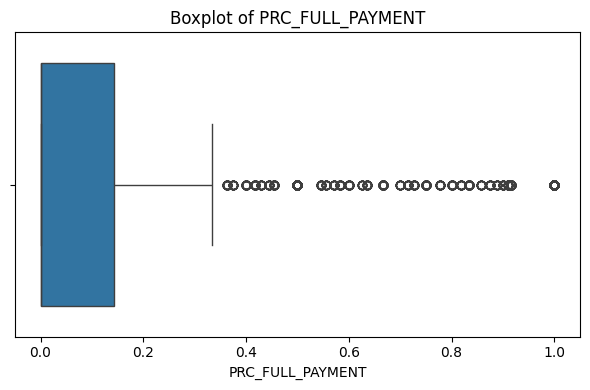

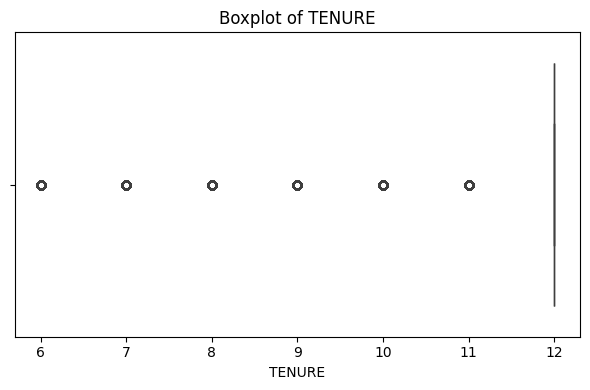

In [48]:
# plot boxplots for df_logarithmic transformed features 
for feature in df_logarithmic.columns:
    plot_boxplot(df_logarithmic, feature)

### Feature Scaling 

Min-Max Scaling (Normalization)
- Scales features between 0 and 1.
- Sensitive to outliers (since max/min values can be extreme).
- Used in Neural Networks & KNN.

Standardization (Z-score Normalization)
- Centers data around mean = 0, standard deviation = 1.
- Less sensitive to outliers compared to Min-Max.
- Used in Linear Regression, Logistic Regression, SVM, PCA, K-Means.

Robust Scaling (Median & IQR-based Scaling)
- Good for handling outliers since it uses median instead of mean.
- Used when data has extreme values.

Max Abs Scaling
- Scales data between -1 and 1, useful when data has both positive and negative values.
- Used in Sparse Data & Neural Networks.


In [49]:
# load datset
# df_logarithmic = pd.read_csv("./dataset/CC_GENERAL_log1p.csv")
df_logarithmic = pd.read_csv("./dataset/CC_GENERAL_log2.csv")

In [50]:
z_scaler = StandardScaler()
maxabs_scaler = MaxAbsScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

In [51]:
df_z_scaled = z_scaler.fit_transform(df_logarithmic)
df_maxabs_scaled = maxabs_scaler.fit_transform(df_logarithmic)
df_minmax_scaled = minmax_scaler.fit_transform(df_logarithmic)
df_robust_scaled = robust_scaler.fit_transform(df_logarithmic)

In [52]:
# print("Original data:\n", df_log1.head())
print("Z Scaled data:\n", df_z_scaled[:2])
print()
print("Maxabs Scaled data:\n", df_maxabs_scaled[:2])
print()
print("MinMax Scaled data:\n", df_minmax_scaled[:2])
print()
print("Robust Scaled data:\n", df_robust_scaled[:2])

Z Scaled data:
 [[-1.0649815  -0.24988139  0.15056818 -1.01997081  0.60680149 -0.95292396
  -0.80664908 -0.67871619 -0.70740935 -0.67529446 -0.9413752  -0.0055724
  -1.44716805 -0.54736245 -0.33374929 -0.52558844  0.36054128]
 [ 0.88301211  0.1340494  -1.77829718 -1.01997081 -1.11835006  1.34743216
  -1.22192823 -0.67871619 -0.91708951  0.57394905  1.00524107 -1.72726791
   0.92594658  0.83657258  0.64858859  0.2341587   0.36054128]]

Maxabs Scaled data:
 [[ 0.37662052  0.818182    0.42203905 -0.43381618  0.45485082 -0.42795725
   0.166667    0.          0.083333    0.         -0.95696508  0.11871907
   0.67007438  0.48987313  0.43919297  0.          1.        ]
 [ 0.8190888   0.909091   -0.42638953 -0.43381618 -0.45953953  0.8150628
   0.          0.          0.          0.16666667  0.28859405 -0.7831175
   0.85883279  0.76789768  0.62057276  0.222222    1.        ]]

MinMax Scaled data:
 [[0.57515728 0.818182   0.59480847 0.         0.62649235 0.
  0.166667   0.         0.083333   0.

In [53]:
# save scalers
import joblib
import os

dir_path = "./transformers"

# ensure folder exists
os.makedirs(dir_path, exist_ok=True)

joblib.dump(z_scaler, f"{dir_path}/z_scaler.pkl")
joblib.dump(maxabs_scaler, f"{dir_path}/maxabs_scaler.pkl")
joblib.dump(minmax_scaler, f"{dir_path}/minmax_scaler.pkl")
joblib.dump(robust_scaler, f"{dir_path}/robust_scaler.pkl")

['./transformers/robust_scaler.pkl']